In [ ]:
pip install streamlit matplotlib seaborn pandas


In [2]:
import pandas as pd

# Load transactional data
transactions_01 = pd.read_csv('/content/Transactional_data_retail_01.csv')
transactions_02 = pd.read_csv('/content/Transactional_data_retail_02.csv')

# Load customer demographics and product info
customer_data = pd.read_csv('/content/CustomerDemographics.csv')
product_info = pd.read_csv('/content/ProductInfo.csv')



# Rename 'Customer ID' to 'CustomerID' in transactions and customer_data
transactions_01.rename(columns={'Customer ID': 'CustomerID'}, inplace=True)
transactions_02.rename(columns={'Customer ID': 'CustomerID'}, inplace=True)
customer_data.rename(columns={'Customer ID': 'CustomerID'}, inplace=True)

# Combine transactional data
transactions = pd.concat([transactions_01, transactions_02])

# Remove negative quantities
transactions = transactions[transactions['Quantity'] > 0]

# Create 'Revenue' column
transactions['Revenue'] = transactions['Quantity'] * transactions['Price']

# Merge with customer and product data
transactions = pd.merge(transactions, customer_data, on='CustomerID', how='left')
transactions = pd.merge(transactions, product_info, on='StockCode', how='left')

# Drop missing values
transactions = transactions.dropna()

# Display the cleaned transactions data
print("Cleaned Transactions Data:")
print(transactions.head())


<ipython-input-2-cf6547df93e8>:25: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  transactions['Revenue'] = transactions['Quantity'] * transactions['Price']


Cleaned Transactions Data:
  Invoice StockCode  Quantity  Price  CustomerID       InvoiceDate  Revenue  \
0  489434     85048        12   6.95     13085.0  01 December 2021     83.4   
1  489434    79323P        12   6.75     13085.0  01 December 2021     81.0   
2  489434    79323P        12   6.75     13085.0  01 December 2021     81.0   
4  489434    79323W        12   6.75     13085.0  01 December 2021     81.0   
5  489434    79323W        12   6.75     13085.0  01 December 2021     81.0   

          Country                          Description  
0  United Kingdom  15CM CHRISTMAS GLASS BALL 20 LIGHTS  
1  United Kingdom                   PINK CHERRY LIGHTS  
2  United Kingdom               Unsaleable, destroyed.  
4  United Kingdom                  WHITE CHERRY LIGHTS  
5  United Kingdom               Unsaleable, destroyed.  


Columns in Transactions Data:
Index(['Invoice', 'StockCode', 'Quantity', 'Price', 'CustomerID',
       'InvoiceDate', 'Revenue', 'Country', 'Description', 'Category'],
      dtype='object')
  Invoice StockCode  Quantity  Price  CustomerID       InvoiceDate  Revenue  \
0  489434     85048        12   6.95     13085.0  01 December 2021     83.4   
1  489434    79323P        12   6.75     13085.0  01 December 2021     81.0   
2  489434    79323P        12   6.75     13085.0  01 December 2021     81.0   
4  489434    79323W        12   6.75     13085.0  01 December 2021     81.0   
5  489434    79323W        12   6.75     13085.0  01 December 2021     81.0   

          Country                          Description     Category  
0  United Kingdom  15CM CHRISTMAS GLASS BALL 20 LIGHTS         15CM  
1  United Kingdom                   PINK CHERRY LIGHTS         PINK  
2  United Kingdom               Unsaleable, destroyed.  Unsaleable,  
4  United Kingdom                  WHITE CHERRY LIGHTS 

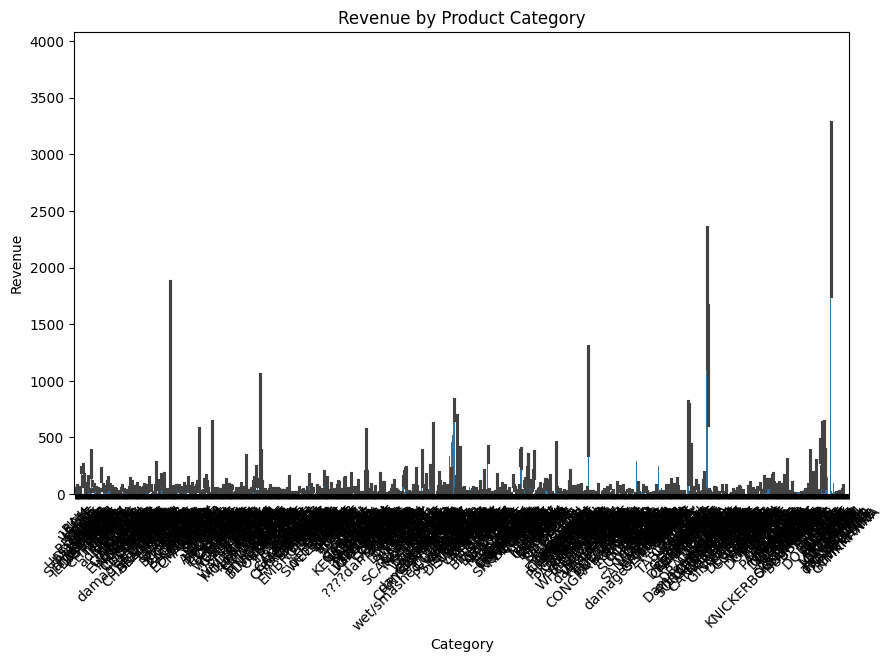

No 'AgeGroup' column found in customer data.


In [5]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

# Assuming you have already loaded and preprocessed your data into 'transactions'
# Check the columns in the transactions DataFrame
print("Columns in Transactions Data:")
print(transactions.columns)

# Print the first few rows to investigate the data
print(transactions.head())

# 1. Customer-level summary statistics
customer_summary = transactions.groupby('CustomerID').agg({
    'Revenue': 'sum',
    'Quantity': 'sum',
    'Invoice': 'count'  # Using 'Invoice' instead of 'InvoiceNo'
}).reset_index()

print("Customer Summary:")
print(customer_summary)

# 2. Product-level summary statistics
product_summary = transactions.groupby('StockCode').agg({
    'Revenue': 'sum',
    'Quantity': 'sum'
}).reset_index()

print("Product Summary:")
print(product_summary)

# 3. Transaction-level summary statistics
transaction_summary = transactions.groupby('InvoiceDate').agg({
    'Quantity': 'sum',
    'Revenue': 'sum'
}).reset_index()

print("Transaction Summary:")
print(transaction_summary)

# 4. Create a simple category based on the Description if 'Category' does not exist
if 'Category' not in transactions.columns:
    # Check if 'Description' exists
    if 'Description' in transactions.columns:
        # Create a new column for Category based on some logic in 'Description'
        transactions['Category'] = transactions['Description'].apply(lambda x: x.split()[0] if isinstance(x, str) else 'Other')  # Example logic
        print("New 'Category' column created based on 'Description'.")

    else:
        print("Neither 'Category' nor 'Description' columns are present in the transactions DataFrame.")

# 5. Plot Revenue by Product Category
if 'Category' in transactions.columns:
    plt.figure(figsize=(10, 6))
    sns.barplot(x='Category', y='Revenue', data=transactions)
    plt.title('Revenue by Product Category')
    plt.xticks(rotation=45)
    plt.show()
else:
    print("Cannot plot Revenue by Category as it is still not present.")

# 6. Customer Age Group Distribution (if there's an AgeGroup column)
if 'AgeGroup' in customer_data.columns:
    plt.figure(figsize=(10, 6))
    sns.countplot(x='AgeGroup', data=customer_data)
    plt.title('Customer Age Group Distribution')
    plt.show()
else:
    print("No 'AgeGroup' column found in customer data.")


In [7]:
# Top 10 Stock Codes by Quantity Sold
top_10_quantity = transactions.groupby('StockCode')['Quantity'].sum().nlargest(10).reset_index()

# Top 10 Stock Codes by Revenue
top_10_revenue = transactions.groupby('StockCode')['Revenue'].sum().nlargest(10).reset_index()

print(top_10_quantity)
print(top_10_revenue)

  StockCode  Quantity
0    85099B     43444
1    85123A     35675
2     21181     21105
3     84879     17670
4     22197     16146
5     20713     15512
6     23084     13384
7     21523     12004
8     22386     11962
9     22189     11755
  StockCode   Revenue
0    85123A  89518.55
1     22423  78244.95
2    85099B  73980.44
3     21523  63303.08
4    48173C  52299.48
5     48188  43174.44
6     21955  42765.12
7     20685  40737.76
8     21181  36099.98
9     21623  33679.92


/usr/local/lib/python3.10/dist-packages/statsmodels/tsa/base/tsa_model.py:473: ValueWarning: An unsupported index was provided. As a result, forecasts cannot be generated. To use the model for forecasting, use one of the supported classes of index.
  self._init_dates(dates, freq)
/usr/local/lib/python3.10/dist-packages/statsmodels/tsa/base/tsa_model.py:473: ValueWarning: An unsupported index was provided. As a result, forecasts cannot be generated. To use the model for forecasting, use one of the supported classes of index.
  self._init_dates(dates, freq)
/usr/local/lib/python3.10/dist-packages/statsmodels/tsa/base/tsa_model.py:473: ValueWarning: An unsupported index was provided. As a result, forecasts cannot be generated. To use the model for forecasting, use one of the supported classes of index.
  self._init_dates(dates, freq)
/usr/local/lib/python3.10/dist-packages/statsmodels/tsa/base/tsa_model.py:837: ValueWarning: No supported index is available. Prediction results will be give

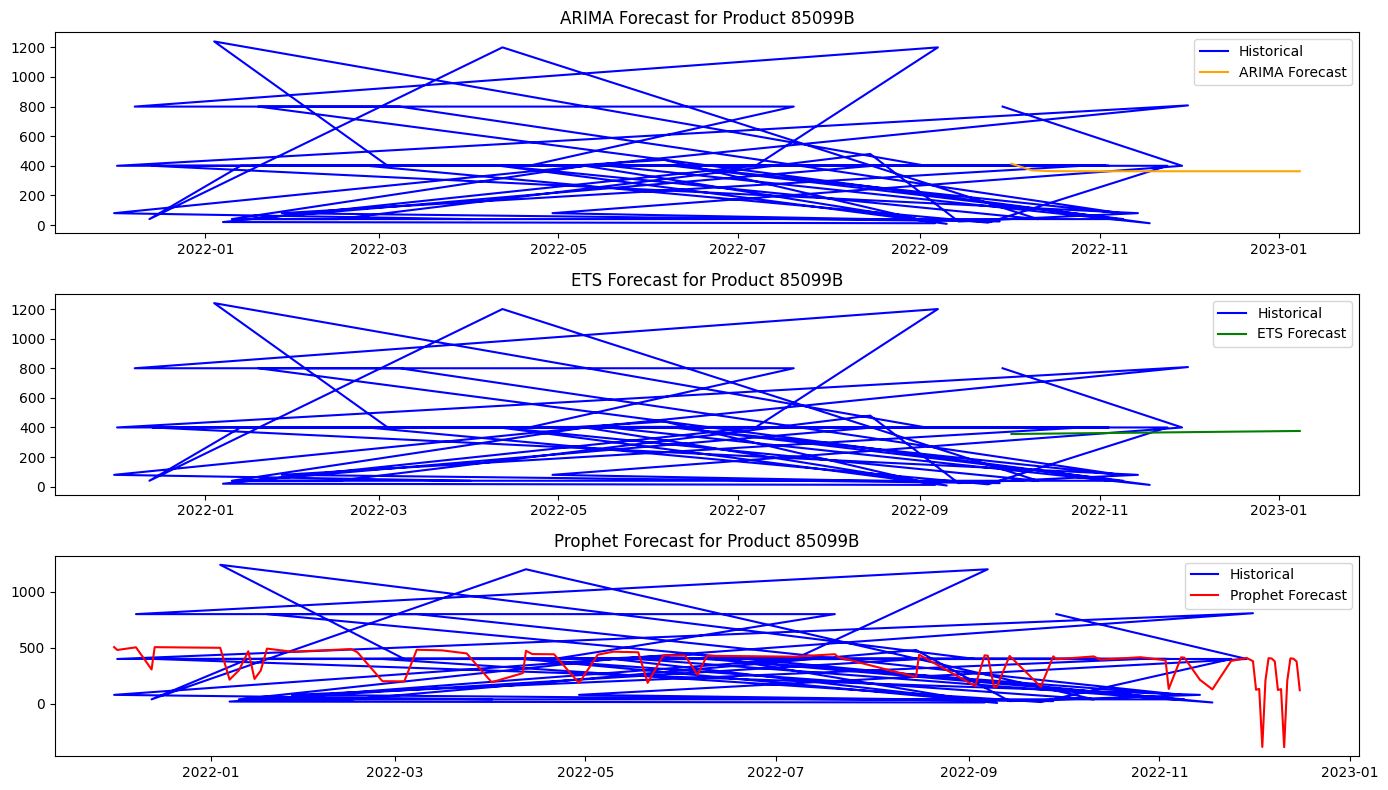

In [14]:
import pandas as pd
import matplotlib.pyplot as plt
from statsmodels.tsa.arima.model import ARIMA
from statsmodels.tsa.holtwinters import ExponentialSmoothing
from prophet import Prophet


# Select one of the top 10 products for time series analysis
product_code = top_10_quantity['StockCode'].iloc[0]
product_data = transactions[transactions['StockCode'] == product_code].groupby('InvoiceDate')['Quantity'].sum().reset_index()

# Convert 'InvoiceDate' to datetime format
product_data['InvoiceDate'] = pd.to_datetime(product_data['InvoiceDate'], errors='coerce')

# Drop rows with NaT values in 'InvoiceDate'
product_data = product_data.dropna(subset=['InvoiceDate'])

# Rename columns for ARIMA and Prophet
product_data.rename(columns={'InvoiceDate': 'ds', 'Quantity': 'y'}, inplace=True)

# ARIMA Model
arima_model = ARIMA(product_data['y'], order=(1, 1, 1))
arima_fit = arima_model.fit()
arima_forecast = arima_fit.forecast(steps=15)

# ETS Model (Exponential Smoothing)
ets_model = ExponentialSmoothing(product_data['y'], trend='add', seasonal=None).fit()
ets_forecast = ets_model.forecast(steps=15)

# Prophet Model
prophet_model = Prophet()
prophet_model.fit(product_data)
future = prophet_model.make_future_dataframe(periods=15)
prophet_forecast = prophet_model.predict(future)

# Plot the forecast
plt.figure(figsize=(14, 8))

# Plot ARIMA Forecast
plt.subplot(3, 1, 1)
plt.plot(product_data['ds'], product_data['y'], label='Historical', color='blue')
plt.plot(pd.date_range(start=product_data['ds'].iloc[-1] + pd.Timedelta(days=1), periods=15, freq='W'), arima_forecast, label='ARIMA Forecast', color='orange')
plt.title(f"ARIMA Forecast for Product {product_code}")
plt.legend()

# Plot ETS Forecast
plt.subplot(3, 1, 2)
plt.plot(product_data['ds'], product_data['y'], label='Historical', color='blue')
plt.plot(pd.date_range(start=product_data['ds'].iloc[-1] + pd.Timedelta(days=1), periods=15, freq='W'), ets_forecast, label='ETS Forecast', color='green')
plt.title(f"ETS Forecast for Product {product_code}")
plt.legend()

# Plot Prophet Forecast
plt.subplot(3, 1, 3)
plt.plot(product_data['ds'], product_data['y'], label='Historical', color='blue')
plt.plot(prophet_forecast['ds'], prophet_forecast['yhat'], label='Prophet Forecast', color='red')
plt.title(f"Prophet Forecast for Product {product_code}")
plt.legend()

plt.tight_layout()
plt.show()


In [15]:
from xgboost import XGBRegressor
from sklearn.tree import DecisionTreeRegressor
from sklearn.model_selection import train_test_split
from sklearn.metrics import mean_absolute_error

# Features and target
X = transactions[['Quantity', 'Price', 'CustomerID']]
y = transactions['Revenue']

# Train-Test Split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Decision Tree
dt_model = DecisionTreeRegressor()
dt_model.fit(X_train, y_train)
dt_pred = dt_model.predict(X_test)
dt_mae = mean_absolute_error(y_test, dt_pred)

# XGBoost
xgb_model = XGBRegressor()
xgb_model.fit(X_train, y_train)
xgb_pred = xgb_model.predict(X_test)
xgb_mae = mean_absolute_error(y_test, xgb_pred)

print(f"Decision Tree MAE: {dt_mae}")
print(f"XGBoost MAE: {xgb_mae}")


Decision Tree MAE: 0.4067059208374516
XGBoost MAE: 1.2937785863940523


In [16]:
from sklearn.model_selection import TimeSeriesSplit

# Time-based cross-validation
tscv = TimeSeriesSplit(n_splits=5)
for train_idx, test_idx in tscv.split(X):
    X_train, X_test = X.iloc[train_idx], X.iloc[test_idx]
    y_train, y_test = y.iloc[train_idx], y.iloc[test_idx]

    # Train and evaluate models
    dt_model.fit(X_train, y_train)
    y_pred = dt_model.predict(X_test)
    print(f"Fold MAE: {mean_absolute_error(y_test, y_pred)}")


Fold MAE: 4.860513085579697
Fold MAE: 9.022422140800858
Fold MAE: 4.1227767600104865
Fold MAE: 2.677342318764745
Fold MAE: 4.721601674954219


In [17]:
# Use the ARIMA/ETS/Prophet models to forecast the next 15 weeks for each of the top 10 products
forecasted_values = {}

for stock_code in top_10_quantity['StockCode']:
    product_data = transactions[transactions['StockCode'] == stock_code].groupby('InvoiceDate')['Quantity'].sum().reset_index()
    arima_model = ARIMA(product_data['Quantity'], order=(1, 1, 1)).fit()
    forecasted_values[stock_code] = arima_model.forecast(steps=15)

# Store forecasted results
forecasted_df = pd.DataFrame(forecasted_values)
forecasted_df.to_csv('forecasted_demand.csv', index=False)


In [18]:
from sklearn.metrics import mean_squared_error
import numpy as np

# Evaluate ARIMA
arima_rmse = np.sqrt(mean_squared_error(product_data['Quantity'][-15:], arima_forecast))
print(f"ARIMA RMSE: {arima_rmse}")


ARIMA RMSE: 265.19472454214963


Number of data points for product 85099B: 51


<ipython-input-21-c9be2423000f>:18: MatplotlibDeprecationWarning: Auto-removal of overlapping axes is deprecated since 3.6 and will be removed two minor releases later; explicitly call ax.remove() as needed.
  plt.subplot(2, 1, 2)


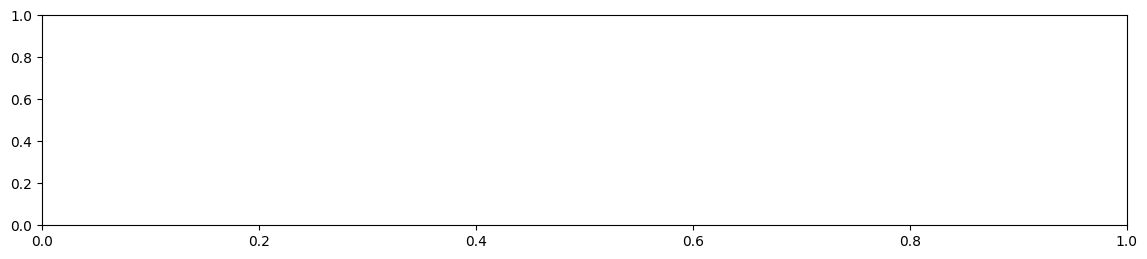

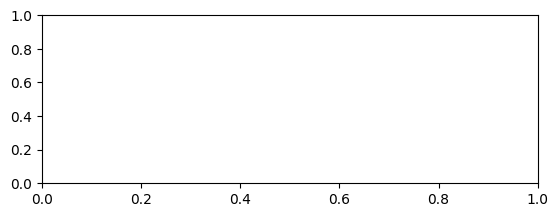

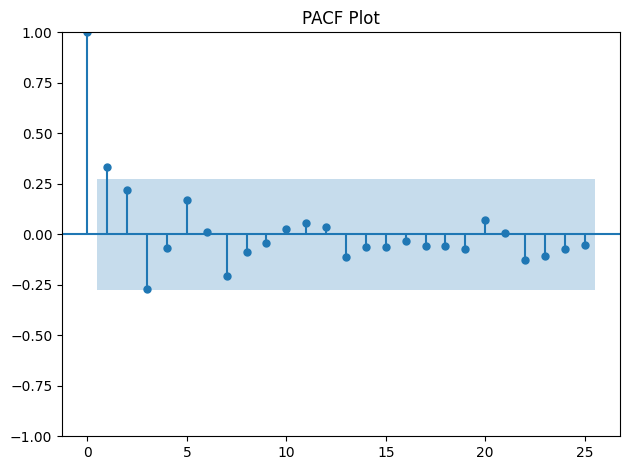

In [21]:
import matplotlib.pyplot as plt
from statsmodels.graphics.tsaplots import plot_acf, plot_pacf

# Check the number of data points
n_points = len(product_data)
print(f"Number of data points for product {product_code}: {n_points}")

# Set nlags to a value that is less than half the sample size
max_lags = n_points // 2

# Plot ACF and PACF with adjusted lags
plt.figure(figsize=(14, 6))

plt.subplot(2, 1, 1)
plot_acf(product_data['Quantity'], lags=min(30, max_lags))  # Use the smaller of 30 or max_lags
plt.title('ACF Plot')

plt.subplot(2, 1, 2)
plot_pacf(product_data['Quantity'], lags=min(30, max_lags))  # Use the smaller of 30 or max_lags
plt.title('PACF Plot')

plt.tight_layout()
plt.show()


In [23]:
import streamlit as st

# App for demand forecasting
st.title("Demand Forecasting System")

# Select a product
selected_product = st.selectbox('Select Product Code', top_10_quantity['StockCode'])

# Select forecast horizon
weeks_to_forecast = st.slider('Select Weeks to Forecast', min_value=1, max_value=15, value=15)

# Forecast and display
st.write(f"Forecast for {selected_product} for {weeks_to_forecast} weeks")
st.line_chart(forecasted_df[selected_product].head(weeks_to_forecast))

# Option to download forecast as CSV
st.download_button(label="Download Forecast", data=forecasted_df[selected_product].to_csv().encode('utf-8'), file_name=f'{selected_product}_forecast.csv', mime='text/csv')


2024-10-05 16:40:10.029 WARNING streamlit.runtime.scriptrunner_utils.script_run_context: Thread 'MainThread': missing ScriptRunContext! This warning can be ignored when running in bare mode.
2024-10-05 16:40:10.154 
  command:

    streamlit run /usr/local/lib/python3.10/dist-packages/colab_kernel_launcher.py [ARGUMENTS]
2024-10-05 16:40:10.156 Thread 'MainThread': missing ScriptRunContext! This warning can be ignored when running in bare mode.
2024-10-05 16:40:10.161 Thread 'MainThread': missing ScriptRunContext! This warning can be ignored when running in bare mode.
2024-10-05 16:40:10.164 Thread 'MainThread': missing ScriptRunContext! This warning can be ignored when running in bare mode.
2024-10-05 16:40:10.170 Thread 'MainThread': missing ScriptRunContext! This warning can be ignored when running in bare mode.
2024-10-05 16:40:10.172 Thread 'MainThread': missing ScriptRunContext! This warning can be ignored when running in bare mode.
2024-10-05 16:40:10.176 Session state does not 

False